<a href="https://colab.research.google.com/github/vidulaarumugam/Machine-learning_vidula/blob/main/lab4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as ns
import pandas as pd
from google.colab import files
file = files.upload()

excel = pd.ExcelFile('data_lab4.xlsx')
data = pd.read_excel(excel, 'Sheet1')


Saving data_lab4.xlsx to data_lab4.xlsx


In [ ]:
import math
#entrophy
def entropy(attribute):
    values = data[attribute].unique()
    entropy = 0
    for value in values:
        p = len(data[data[attribute] == value]) / len(data) #For each unique value, this line calculates the probability p of that value occurring in the dataset
        entropy += -p * math.log2(p) #formula to calcualte entrophy
    return entropy
age_entropy = entropy('age')
income_entropy = entropy('income')
student_entropy = entropy('student')
credit_rating_entropy = entropy('credit_rating')
buys_computer_entropy = entropy('buys_computer')
print('Entropy for Age:', age_entropy)
print('Entropy for Income:', income_entropy)
print('Entropy for Student:', student_entropy)
print('Entropy for Credit Rating:', credit_rating_entropy)
print('Entropy for Buys Computer (Class Label):', buys_computer_entropy)

#information gain:o determine the usefulness of a feature (attribute) for splitting a dataset
def information_gain(attribute):
    values = data[attribute].unique()
    information_gain = buys_computer_entropy
    for value in values:
        subset = data[data[attribute] == value]
        p = len(subset) / len(data)
        information_gain -= p * entropy('buys_computer')
    return information_gain


age_information_gain = information_gain('age')
income_information_gain = information_gain('income')
student_information_gain = information_gain('student')
credit_rating_information_gain = information_gain('credit_rating')

print('Information Gain for Age:', age_information_gain)
print('Information Gain for Income:', income_information_gain)
print('Information Gain for Student:', student_information_gain)
print('Information Gain for Credit Rating:', credit_rating_information_gain)

#root node
root_node = max(age_information_gain, income_information_gain, student_information_gain, credit_rating_information_gain)
if root_node == age_information_gain:
    print('The first feature for constructing the decision tree is Age.')
elif root_node == income_information_gain:
    print('The first feature for constructing the decision tree is Income.')
elif root_node == student_information_gain:
    print('The first feature for constructing the decision tree is Student.')
else:
    print('The first feature for constructing the decision tree is Credit Rating.')

Entropy for Age: 1.5774062828523454
Entropy for Income: 1.8352377453121174
Entropy for Student: 1.0
Entropy for Credit Rating: 0.9852281360342515
Entropy for Buys Computer (Class Label): 0.9402859586706311
Information Gain for Age: 1.1102230246251565e-16
Information Gain for Income: 1.5265566588595902e-16
Information Gain for Student: 0.0
Information Gain for Credit Rating: 1.1102230246251565e-16
The first feature for constructing the decision tree is Income.


In [ ]:
#A2)
from sklearn.tree import DecisionTreeClassifier,plot_tree
#making the data sets to array
age = ns.array(['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'])
income = ns.array(['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'])
student = ns.array(['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes'])
credit_rating = ns.array(['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'])
buys_computer = ns.array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'])

#creating decision tree
model = DecisionTreeClassifier()
# Prepare feature matrix by encoding categorical features
X = ns.column_stack((age, income, student, credit_rating))
X_encoded = ns.zeros(X.shape, dtype=int)

for i in range(X.shape[1]):
    unique_values, encoded = ns.unique(X[:, i], return_inverse=True)
    X_encoded[:, i] = encoded

model.fit(X_encoded, buys_computer)
depth = model.get_depth()

print(f"Depth of the constructed decision tree: {depth}")

Depth of the constructed decision tree: 5


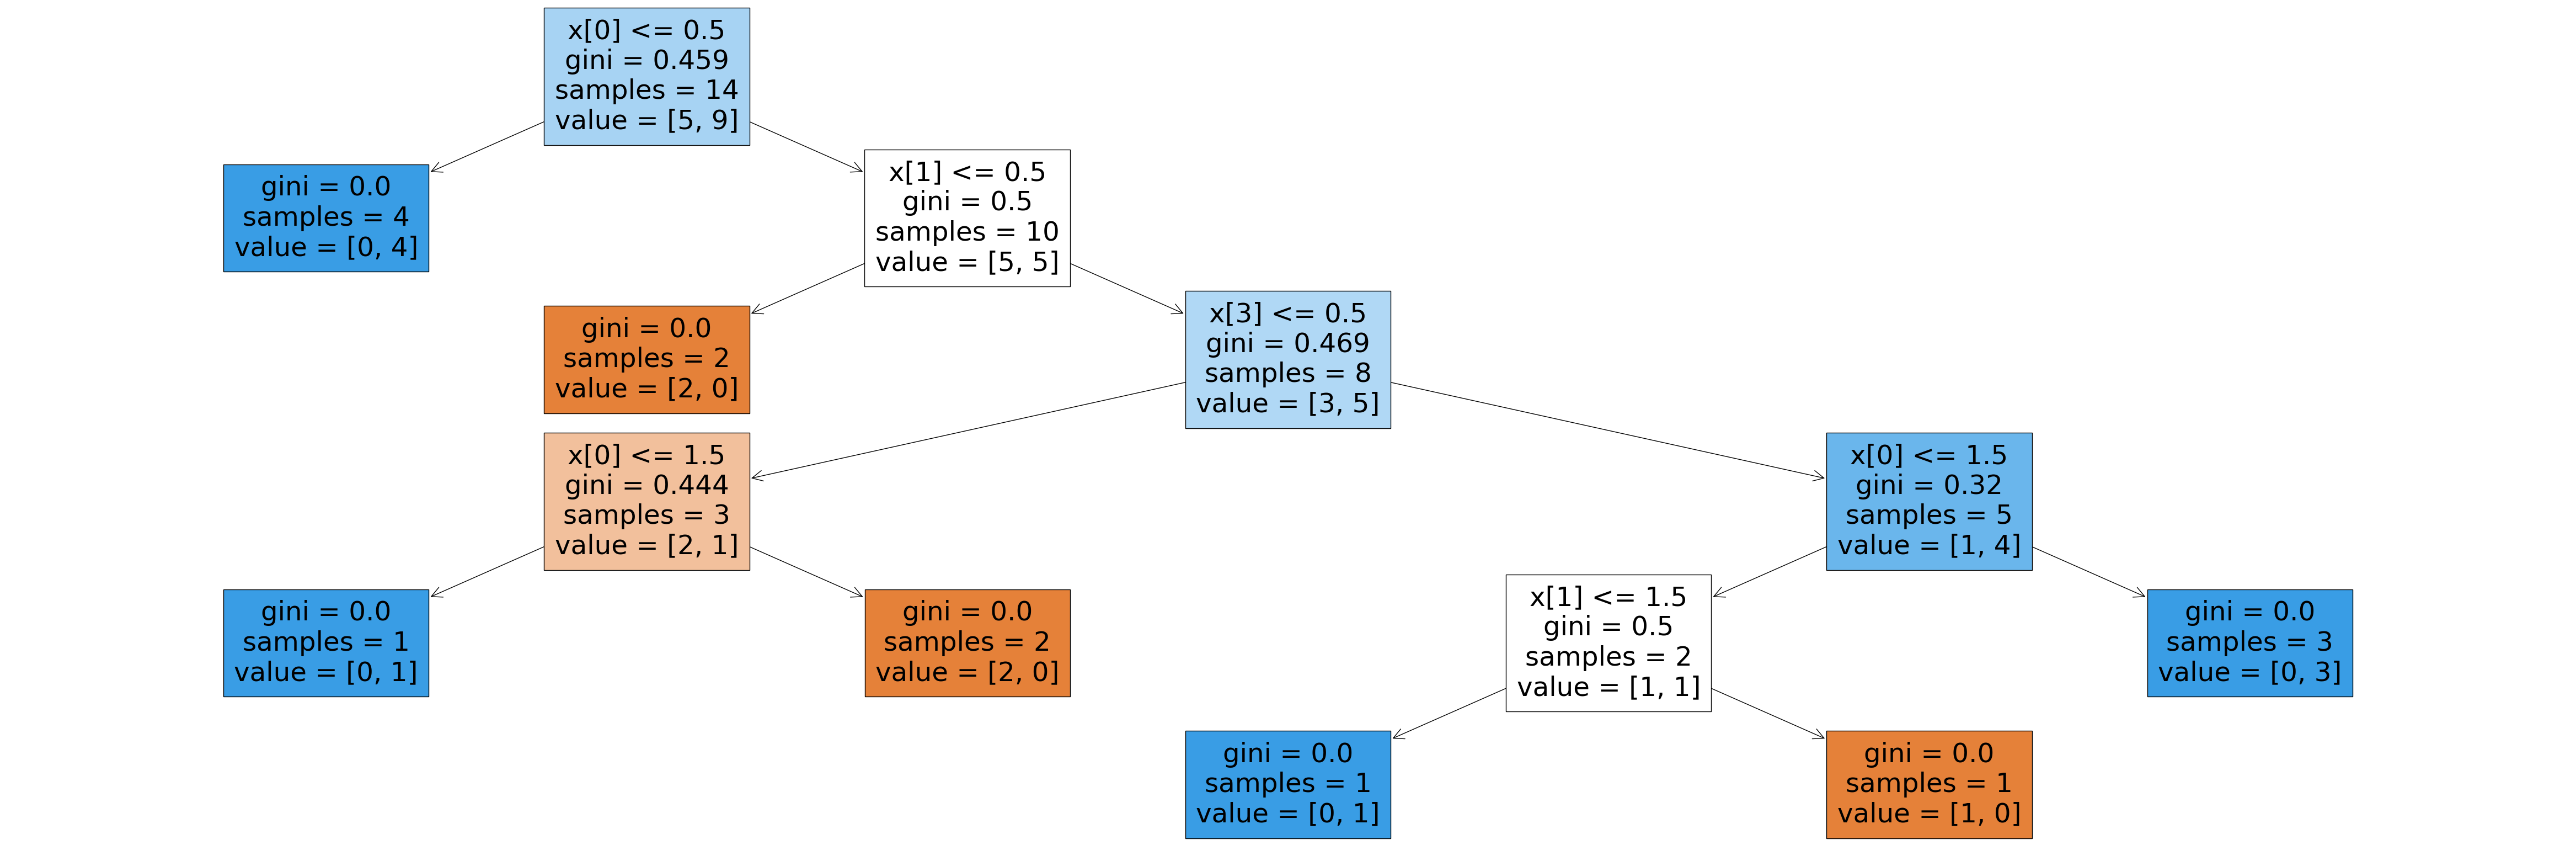

In [ ]:
#A3)Visualize the constructed tree with plot_tree() command
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(60,20))
plot_tree(model, filled=True)
plt.show()


Training Accuracy: 1.0
Test Accuracy: 0.8731563421828908


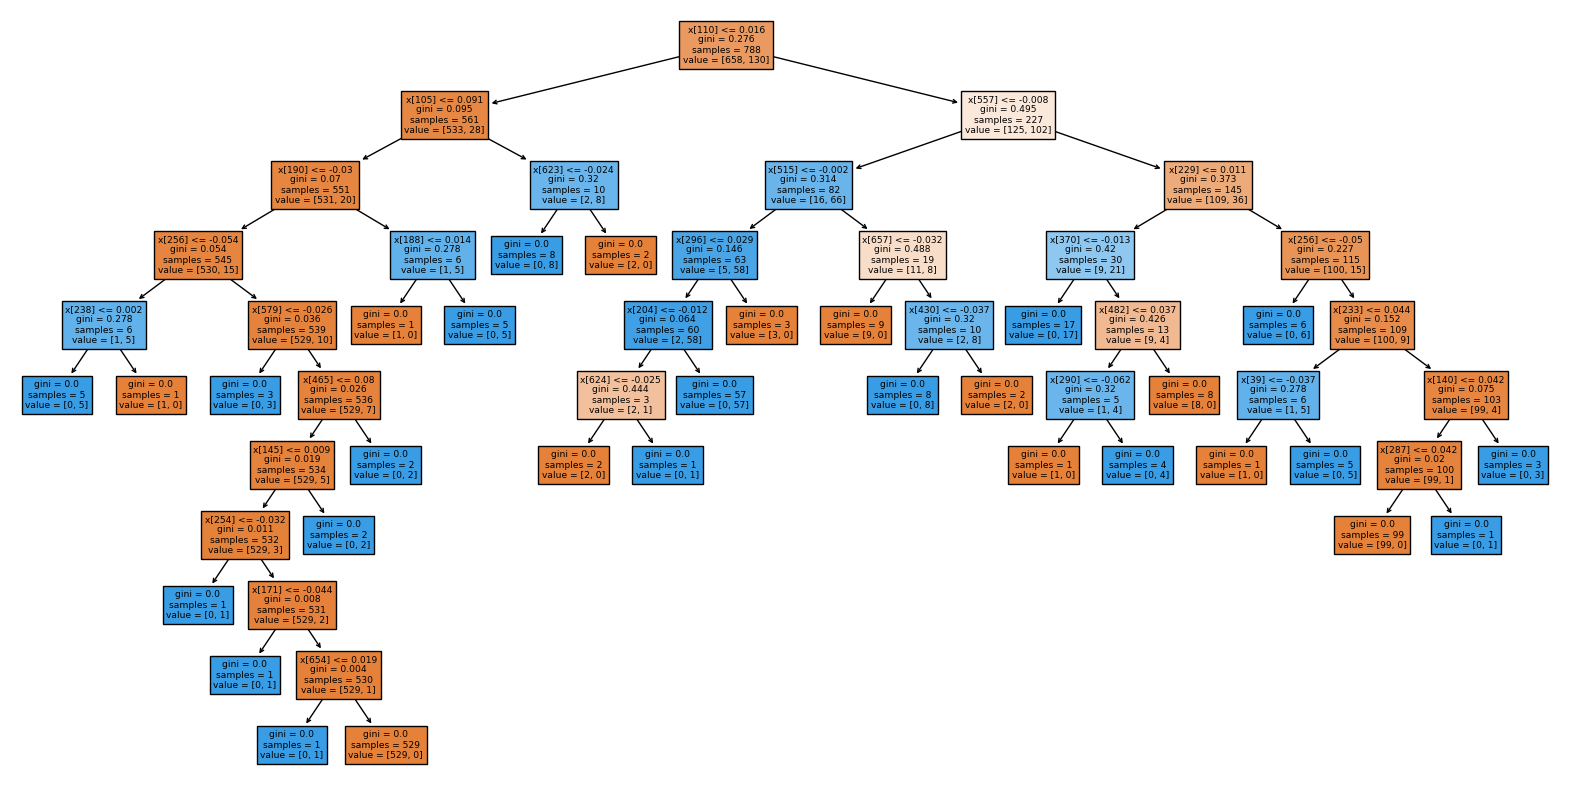

In [ ]:
#A4)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
excel = pd.ExcelFile('t5_train (1).xlsx')
df = pd.read_excel(excel, 'Sheet1')

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Threshold to segregate into 2 classes (range[-inf,0] as 0 and range[0,inf] as 1)
threshold = 0
y_binary = ns.where(y >= threshold, 1, 0)

X_train,X_test,y_train,y_test=train_test_split(X,y_binary,test_size=0.3)
#creating decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict on the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

Accuracy with max_depth=5: 0.87


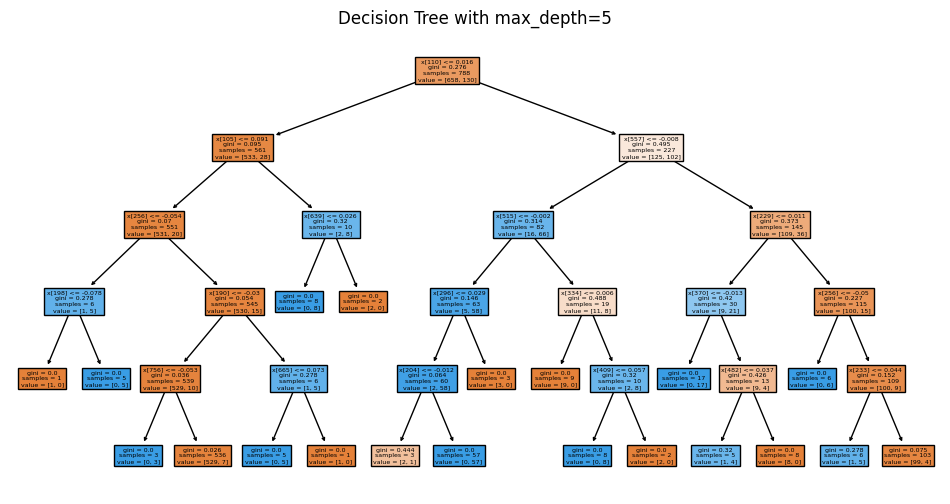

In [ ]:
#A5) Impose a max_depth constraint on the tree construction. Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint.
max_depth = 5
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max_depth={max_depth}: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True)
plt.title(f'Decision Tree with max_depth={max_depth}')
plt.show()

Accuracy with default criterion='entropy': 0.89


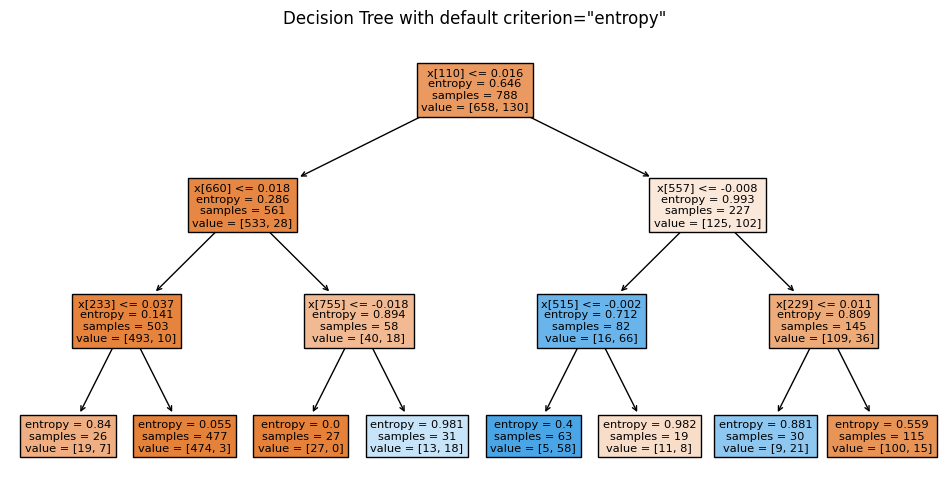

In [ ]:
#A6) Change the criterion to “Entropy”

clf_entropy = DecisionTreeClassifier(max_depth= 3,criterion="entropy")

# Fit the classifier on the training data
clf_entropy.fit(X_train, y_train)

# Predict on the test data
y_pred_entropy = clf_entropy.predict(X_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with default criterion='entropy': {accuracy_entropy:.2f}")

# Visualize the decision tree with "entropy" criterion
plt.figure(figsize=(12, 6))
plot_tree(clf_entropy, filled=True)
plt.title('Decision Tree with default criterion="entropy"')
plt.show()


#differences between the default criterion and entropy criterion
#Gini impurity measures the level of disorder or impurity in a dataset. It quantifies the probability of misclassifying a randomly chosen element if it were randomly classified according to the class distribution in the dataset.
#Entropy, like Gini impurity, measures the level of disorder or impurity in a dataset. However, entropy often leads to more balanced splits in the tree compared to Gini impurity.






In [ ]:
#A7)random forest classifier and comparing it to the above model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
 #Evaluation Desicion tree
report_tree = classification_report(y_test, y_pred)
print("Classification Report of DecisionTree:")
print(report_tree)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)


y_pred_rf = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report of Random Forest classifier:")
print(report_rf)




Classification Report of DecisionTree:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       283
           1       0.63      0.55      0.59        56

    accuracy                           0.87       339
   macro avg       0.77      0.74      0.76       339
weighted avg       0.87      0.87      0.87       339


Random Forest Classifier:
Accuracy: 0.93
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       283
           1       0.94      0.59      0.73        56

    accuracy                           0.93       339
   macro avg       0.93      0.79      0.84       339
weighted avg       0.93      0.93      0.92       339



In [ ]:
#A8) Study the various parameters and model attributes of random forest classifier. Understand their significance in the behavior of the model.
clf = RandomForestClassifier(
    n_estimators=100,  # Number of decision trees in the forest
    max_depth=None,    # Maximum depth of individual trees (None means unlimited)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    max_features='auto',  # The number of features to consider when looking for the best split ('auto' means sqrt(n_features))
    random_state=42      # Seed for random number generator for reproducibility
)

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Important model attributes:

print("Estimators (Individual Decision Trees):", clf.estimators_)  # List of individual decision trees in the forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9262536873156342
Estimators (Individual Decision Trees): [DecisionTreeClassifier(max_features='sqrt', random_state=1608637542), DecisionTreeClassifier(max_features='sqrt', random_state=1273642419), DecisionTreeClassifier(max_features='sqrt', random_state=1935803228), DecisionTreeClassifier(max_features='sqrt', random_state=787846414), DecisionTreeClassifier(max_features='sqrt', random_state=996406378), DecisionTreeClassifier(max_features='sqrt', random_state=1201263687), DecisionTreeClassifier(max_features='sqrt', random_state=423734972), DecisionTreeClassifier(max_features='sqrt', random_state=415968276), DecisionTreeClassifier(max_features='sqrt', random_state=670094950), DecisionTreeClassifier(max_features='sqrt', random_state=1914837113), DecisionTreeClassifier(max_features='sqrt', random_state=669991378), DecisionTreeClassifier(max_features='sqrt', random_state=429389014), DecisionTreeClassifier(max_features='sqrt', random_state=249467210), DecisionTreeClassifier(max_f